# Keras with Mandy - Part 1

This is a code-along with **Mandy** from [DeepLizard.com]( https://deeplizard.com/learn/playlist/PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL)

 <img src="DeepLizard_logo.png" width="200" align="left"/>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation-and-Processing" data-toc-modified-id="Data-Preparation-and-Processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation and Processing</a></span><ul class="toc-item"><li><span><a href="#Example-Data-(Clinical-Trial)" data-toc-modified-id="Example-Data-(Clinical-Trial)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Example Data (Clinical Trial)</a></span></li><li><span><a href="#Plot-data" data-toc-modified-id="Plot-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot data</a></span></li><li><span><a href="#Make-NumPy-arrays" data-toc-modified-id="Make-NumPy-arrays-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Make NumPy arrays</a></span></li><li><span><a href="#Shuffle-the-data" data-toc-modified-id="Shuffle-the-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Shuffle the data</a></span></li><li><span><a href="#Rescale-the-the-data" data-toc-modified-id="Rescale-the-the-data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Rescale the the data</a></span></li></ul></li><li><span><a href="#Keras-TensorFlow-model" data-toc-modified-id="Keras-TensorFlow-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Keras TensorFlow model</a></span><ul class="toc-item"><li><span><a href="#Set-up-Tensorflow-and-Keras" data-toc-modified-id="Set-up-Tensorflow-and-Keras-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Set up Tensorflow and Keras</a></span></li><li><span><a href="#Run-Tensorflow-on-NVidia-GPU" data-toc-modified-id="Run-Tensorflow-on-NVidia-GPU-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Run Tensorflow on NVidia GPU</a></span></li><li><span><a href="#Define-the-model-layers" data-toc-modified-id="Define-the-model-layers-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Define the model layers</a></span></li></ul></li></ul></div>

## Environment Set Up

- To install a new Tensorflow conda enviroment in commad line, see my [blog post](https://ukidlucas.blogspot.com/2018/10/ipykernel.html)
- conda env create -f environment_py_36_turi.yml

In [1]:
## Uncomment for the first run
# !pip install matplotlib
# !pip install -U scikit-learn
# !conda update --all -y

## Data Preparation and Processing

[the video starts at ...](https://www.youtube.com/watch?v=qFJeN9V1ZsI&feature=youtu.be&t=647)

In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_lables = []
train_samples = []

### Example Data (Clinical Trial)
- An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial.
- The trail had 2100 participants. Half were under 65 years old, half were older.
- Around 95% of patients ...

[the video starts at ..](https://youtu.be/qFJeN9V1ZsI?t=750)


In [4]:
for i in range (50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_lables.append(1) # side effects
    
    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_lables.append(0) # no side effects
    
for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_lables.append(0)
    
    # The ~95% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_lables.append(1)
    

### Plot data

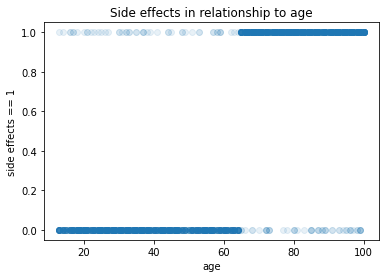

In [5]:
# This plot is not in the video, but it is useful to visualize the data
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(train_samples, train_lables, alpha=0.1)
plt.title('Side effects in relationship to age')
plt.xlabel('age')
plt.ylabel('side effects == 1')
plt.show()

### Make NumPy arrays

[the video continues from 16:02](https://youtu.be/qFJeN9V1ZsI?t=962)

In [6]:
train_lables = np.array(train_lables)
train_samples = np.array(train_samples)

### Shuffle the data

In [7]:
train_lables, train_samples = shuffle(train_lables, train_samples)

### Rescale the the data

We are rescaling the age data from range of (16 to 100) to (-1 to 1).

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

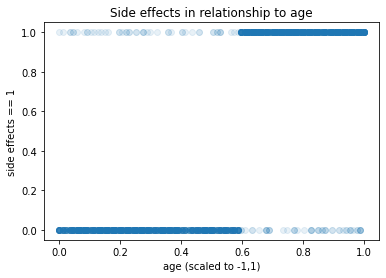

In [9]:
# This plot is not in the video, but it is useful to visualize the data
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(scaled_train_samples, train_lables, alpha=0.1)
plt.title('Side effects in relationship to age')
plt.xlabel('age (scaled to -1,1)')
plt.ylabel('side effects == 1')
plt.show()

##  Keras TensorFlow model

[the video continues from 18:39](https://youtu.be/qFJeN9V1ZsI?t=1119)

### Set up Tensorflow and Keras

In [10]:
import tensorflow as tf

- [CategoricalCrossentropy class](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class)

In [11]:
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dense 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

### Run Tensorflow on NVidia GPU

If you have Nvidia GPU

In [12]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
num_gpu_available = len(physical_devices)
print("Num GPU Available: ", num_gpu_available)

Num GPU Available:  0


In [13]:
if (num_gpu_available > 0):
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("NVidia GPU is being used")

### Define the model layers

- input layer (not explicitly declared)
- hidden dense (fully connected) layer with (arbitrary) 16 nodes (units)
    - relu function returns 0 for anything below zero and value for anything above zero
- hidden dense (fully connected) layer with (arbitrary) 32 nodes (units)
    - relu function returns 0 for anything below zero and value for anything above zero
- output dense (fully connected) layer with resulting (side effects, or not) 2 nodes (units)
    - softmax function returns probablity

In [14]:
model=Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## Training the model
    
    
this section covers the video from [24:38](https://youtu.be/qFJeN9V1ZsI?t=1477) to 29:50.

In [16]:
model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
result = model.fit(
    x=scaled_train_samples,
    y=train_lables,
    batch_size=10,
    epochs=15,               # train all data x times
    shuffle=True,            # default True
    verbose=2
)

Train on 2100 samples
Epoch 1/15
2100/2100 - 0s - loss: 0.7112 - accuracy: 0.4071
Epoch 2/15
2100/2100 - 0s - loss: 0.6835 - accuracy: 0.5048
Epoch 3/15
2100/2100 - 0s - loss: 0.6593 - accuracy: 0.5933
Epoch 4/15
2100/2100 - 0s - loss: 0.6314 - accuracy: 0.6719
Epoch 5/15
2100/2100 - 0s - loss: 0.6042 - accuracy: 0.7152
Epoch 6/15
2100/2100 - 0s - loss: 0.5793 - accuracy: 0.7462
Epoch 7/15
2100/2100 - 0s - loss: 0.5539 - accuracy: 0.7890
Epoch 8/15
2100/2100 - 0s - loss: 0.5281 - accuracy: 0.8033
Epoch 9/15
2100/2100 - 0s - loss: 0.5016 - accuracy: 0.8324
Epoch 10/15
2100/2100 - 0s - loss: 0.4734 - accuracy: 0.8429
Epoch 11/15
2100/2100 - 0s - loss: 0.4462 - accuracy: 0.8624
Epoch 12/15
2100/2100 - 0s - loss: 0.4210 - accuracy: 0.8733
Epoch 13/15
2100/2100 - 0s - loss: 0.3981 - accuracy: 0.8881
Epoch 14/15
2100/2100 - 0s - loss: 0.3779 - accuracy: 0.8957
Epoch 15/15
2100/2100 - 0s - loss: 0.3603 - accuracy: 0.9033


## Validation

this section covers the video from [29:50](https://youtu.be/qFJeN9V1ZsI?t=1477) to 39:28.

Overfitting: learning well on the training data, but not able to "generalize" in order to perform on the new (validation) data.

In [18]:
result = model.fit(
    x=scaled_train_samples,
    y=train_lables,
    validation_split=0.1,
    batch_size=30,
    epochs=250,               # train all data x times
    shuffle=True,            # default True, the prior shuffle of the training data is still needed
    verbose=2
)

# batch_size=25,
# epochs=2000,   
# Epoch 2000/2000 1890/1890 - 0s - loss: 0.1904 - accuracy: 0.9534 - val_loss: 0.2136 - val_accuracy: 0.9429

# batch_size=10,
# epochs=1000,  
# Epoch 1000/1000 1890/1890 - 0s - loss: 0.1938 - accuracy: 0.9534 - val_loss: 0.2310 - val_accuracy: 0.9429

#batch_size=10,
#epochs=250, 
# Epoch 250/250   1890/1890 - 0s - loss: 0.1923 - accuracy: 0.9534 - val_loss: 0.2291 - val_accuracy: 0.9429

# batch_size=30,
# epochs=250, 
# Epoch 250/250  1890/1890 - 0s - loss: 0.2280 - accuracy: 0.9519 - val_loss: 0.2040 - val_accuracy: 0.9571

Train on 1890 samples, validate on 210 samples
Epoch 1/250
1890/1890 - 0s - loss: 0.3517 - accuracy: 0.9069 - val_loss: 0.3307 - val_accuracy: 0.9000
Epoch 2/250
1890/1890 - 0s - loss: 0.3474 - accuracy: 0.9069 - val_loss: 0.3262 - val_accuracy: 0.9000
Epoch 3/250
1890/1890 - 0s - loss: 0.3432 - accuracy: 0.9069 - val_loss: 0.3219 - val_accuracy: 0.9000
Epoch 4/250
1890/1890 - 0s - loss: 0.3391 - accuracy: 0.9111 - val_loss: 0.3177 - val_accuracy: 0.9095
Epoch 5/250
1890/1890 - 0s - loss: 0.3353 - accuracy: 0.9138 - val_loss: 0.3136 - val_accuracy: 0.9095
Epoch 6/250
1890/1890 - 0s - loss: 0.3314 - accuracy: 0.9138 - val_loss: 0.3095 - val_accuracy: 0.9095
Epoch 7/250
1890/1890 - 0s - loss: 0.3278 - accuracy: 0.9138 - val_loss: 0.3060 - val_accuracy: 0.9095
Epoch 8/250
1890/1890 - 0s - loss: 0.3243 - accuracy: 0.9138 - val_loss: 0.3023 - val_accuracy: 0.9095
Epoch 9/250
1890/1890 - 0s - loss: 0.3209 - accuracy: 0.9138 - val_loss: 0.2985 - val_accuracy: 0.9095
Epoch 10/250
1890/1890 - 0

Epoch 80/250
1890/1890 - 0s - loss: 0.2540 - accuracy: 0.9365 - val_loss: 0.2260 - val_accuracy: 0.9381
Epoch 81/250
1890/1890 - 0s - loss: 0.2538 - accuracy: 0.9429 - val_loss: 0.2260 - val_accuracy: 0.9524
Epoch 82/250
1890/1890 - 0s - loss: 0.2536 - accuracy: 0.9423 - val_loss: 0.2258 - val_accuracy: 0.9524
Epoch 83/250
1890/1890 - 0s - loss: 0.2534 - accuracy: 0.9434 - val_loss: 0.2256 - val_accuracy: 0.9524
Epoch 84/250
1890/1890 - 0s - loss: 0.2533 - accuracy: 0.9434 - val_loss: 0.2255 - val_accuracy: 0.9524
Epoch 85/250
1890/1890 - 0s - loss: 0.2531 - accuracy: 0.9434 - val_loss: 0.2253 - val_accuracy: 0.9524
Epoch 86/250
1890/1890 - 0s - loss: 0.2531 - accuracy: 0.9402 - val_loss: 0.2252 - val_accuracy: 0.9524
Epoch 87/250
1890/1890 - 0s - loss: 0.2529 - accuracy: 0.9434 - val_loss: 0.2251 - val_accuracy: 0.9524
Epoch 88/250
1890/1890 - 0s - loss: 0.2527 - accuracy: 0.9418 - val_loss: 0.2250 - val_accuracy: 0.9524
Epoch 89/250
1890/1890 - 0s - loss: 0.2526 - accuracy: 0.9423 - 

Epoch 159/250
1890/1890 - 0s - loss: 0.2449 - accuracy: 0.9434 - val_loss: 0.2191 - val_accuracy: 0.9524
Epoch 160/250
1890/1890 - 0s - loss: 0.2447 - accuracy: 0.9434 - val_loss: 0.2188 - val_accuracy: 0.9524
Epoch 161/250
1890/1890 - 0s - loss: 0.2446 - accuracy: 0.9434 - val_loss: 0.2187 - val_accuracy: 0.9524
Epoch 162/250
1890/1890 - 0s - loss: 0.2445 - accuracy: 0.9434 - val_loss: 0.2187 - val_accuracy: 0.9524
Epoch 163/250
1890/1890 - 0s - loss: 0.2444 - accuracy: 0.9434 - val_loss: 0.2186 - val_accuracy: 0.9524
Epoch 164/250
1890/1890 - 0s - loss: 0.2443 - accuracy: 0.9434 - val_loss: 0.2185 - val_accuracy: 0.9524
Epoch 165/250
1890/1890 - 0s - loss: 0.2443 - accuracy: 0.9434 - val_loss: 0.2184 - val_accuracy: 0.9524
Epoch 166/250
1890/1890 - 0s - loss: 0.2444 - accuracy: 0.9434 - val_loss: 0.2183 - val_accuracy: 0.9524
Epoch 167/250
1890/1890 - 0s - loss: 0.2442 - accuracy: 0.9434 - val_loss: 0.2185 - val_accuracy: 0.9524
Epoch 168/250
1890/1890 - 0s - loss: 0.2440 - accuracy:

1890/1890 - 0s - loss: 0.2397 - accuracy: 0.9434 - val_loss: 0.2157 - val_accuracy: 0.9524
Epoch 238/250
1890/1890 - 0s - loss: 0.2397 - accuracy: 0.9434 - val_loss: 0.2156 - val_accuracy: 0.9524
Epoch 239/250
1890/1890 - 0s - loss: 0.2396 - accuracy: 0.9434 - val_loss: 0.2155 - val_accuracy: 0.9524
Epoch 240/250
1890/1890 - 0s - loss: 0.2395 - accuracy: 0.9434 - val_loss: 0.2154 - val_accuracy: 0.9524
Epoch 241/250
1890/1890 - 0s - loss: 0.2396 - accuracy: 0.9434 - val_loss: 0.2154 - val_accuracy: 0.9524
Epoch 242/250
1890/1890 - 0s - loss: 0.2394 - accuracy: 0.9434 - val_loss: 0.2153 - val_accuracy: 0.9524
Epoch 243/250
1890/1890 - 0s - loss: 0.2394 - accuracy: 0.9434 - val_loss: 0.2154 - val_accuracy: 0.9524
Epoch 244/250
1890/1890 - 0s - loss: 0.2393 - accuracy: 0.9434 - val_loss: 0.2153 - val_accuracy: 0.9524
Epoch 245/250
1890/1890 - 0s - loss: 0.2392 - accuracy: 0.9434 - val_loss: 0.2153 - val_accuracy: 0.9524
Epoch 246/250
1890/1890 - 0s - loss: 0.2392 - accuracy: 0.9434 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


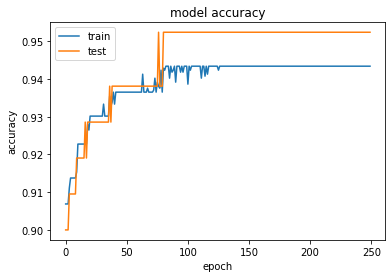

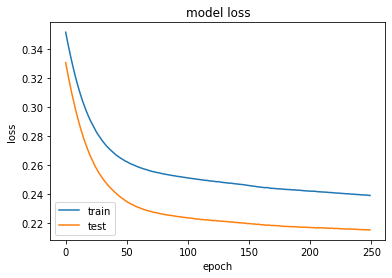

In [19]:
print(result.history.keys())

plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()

## Prediction (Inference)

this section covers the video from [39:28](https://youtu.be/qFJeN9V1ZsI?t=2368) to 39:14.

In [20]:
## If the notebook above works properly, 
## you may want to uncomment the line below and export correct conda env.

#!conda env export -n py36_TensorFlow > environment_py_36_TensorFlow.yml